# Image Recognition of MNIST Digit Data using 2-layer Convolutional Neural Network (CNN)

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from MNIST_data import MNIST

mnist = MNIST('../dataset/MNIST')
x_train, y_train = mnist.load_training() #60000 samples
x_test, y_test = mnist.load_testing()    #10000 samples


In [59]:
from keras.datasets import mnist

In [60]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data(path='mnist.npz')

In [61]:
len(X_train)

60000

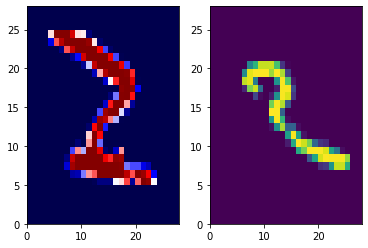

In [79]:
X_tr = X_train[0:1000]
Y_tr = Y_train[0:1000]
X_tr.shape
plt.subplot(1,2,1)
plt.pcolor(X_tr[0],cmap='seismic')

plt.subplot(1,2,2)
plt.pcolor(X_tr[11],cmap='viridis')
#np.unique(Y_tr)

In [80]:
type(X_train)
X_train = np.array(X_tr).astype('int64')
X_test = np.array(X_test).astype('int64')
Y_train = np.array(Y_tr).astype('int64')
Y_test = np.array(Y_test).astype('int64')

In [81]:
X_tr = X_train/(np.max(X_train)-np.min(X_train));
X_te = X_test/(np.max(X_test)-np.min(X_test));
np.unique(Y_tr[0:500])
#X_training = X_tr[0:500];
#Y_training = Y_tr[0:500];
#X_te=X_te[0:500]
#Y_test = Y_test[0:500];
X_tr.shape

(100, 28, 28)

In [65]:
np.unique(Y_tr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [88]:
X_tr = X_train[0:30000]
Y_tr = Y_train[0:30000]

In [91]:
print(Y_tr[9])
np.size(X_tr)

4


78400

In [85]:
exec(open('cnn.py').read())
cnn = CNN();

In [86]:
lr =10**(-4);
layer_neurons=[10];
layer = ['softmax'];
e = 5
k1,b1,k2,b2 = cnn.cnn_fit(X_tr,Y_tr,e,lr,layer_neurons,layer)

Epoch 0
label = 5
Epoch 1
label = 6
Epoch 2
label = 2
Epoch 3
label = 4
Epoch 4
label = 6


In [74]:
Y_tr

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=int64)

In [75]:
y_hat = cnn.cnn_predict(X_te[0:1000],k1,b1,k2,b2,layer_neurons,layer)

In [76]:
y_hat

array([[1.],
       [4.],
       [0.],
       [6.],
       [8.],
       [1.],
       [1.],
       [4.],
       [8.],
       [6.],
       [6.],
       [7.],
       [9.],
       [0.],
       [3.],
       [1.],
       [2.],
       [0.],
       [9.],
       [7.],
       [8.],
       [4.],
       [2.],
       [8.],
       [6.],
       [8.],
       [6.],
       [1.],
       [0.],
       [6.],
       [7.],
       [7.],
       [0.],
       [1.],
       [8.],
       [3.],
       [8.],
       [4.],
       [4.],
       [5.],
       [9.],
       [9.],
       [7.],
       [7.],
       [0.],
       [8.],
       [4.],
       [1.],
       [9.],
       [3.],
       [0.],
       [6.],
       [5.],
       [9.],
       [2.],
       [1.],
       [7.],
       [7.],
       [5.],
       [2.],
       [2.],
       [4.],
       [4.],
       [3.],
       [7.],
       [9.],
       [5.],
       [1.],
       [9.],
       [4.],
       [7.],
       [6.],
       [0.],
       [2.],
       [5.],
       [4.],
       [2.],

In [77]:
cnn.multi_classification_report(Y_test[0:1000],y_hat,layer_neurons)

10
0
label= 0
CLASSIFICATION REPORT CNN  class_label        0.000000
precision/PPV      0.125000
recall             0.141176
accuracy           0.842843
F1_score           0.132597
sensitivity/TPR    0.141176
specificity/TNR    0.908096
dtype: float64
CONFUSION MATRIX                 Actual Positive  Actual Negative  Total
Model Positive               12               84     96
Model Negative               73              830    903
Total                        85              914    999
/n
1
label= 1
CLASSIFICATION REPORT CNN  class_label        1.000000
precision/PPV      0.068376
recall             0.063492
accuracy           0.772773
F1_score           0.065844
sensitivity/TPR    0.063492
specificity/TNR    0.875143
dtype: float64
CONFUSION MATRIX                 Actual Positive  Actual Negative  Total
Model Positive                8              109    117
Model Negative              118              764    882
Total                       126              873    999
/n
2
label= 2


cnn.metrics(Y_test[0:1000],y_hat)

In [47]:
Y_test[0:500]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

10
0
label= 0
CLASSIFICATION REPORT CNN  class_label        0.000000
precision/PPV      0.032967
recall             0.035294
accuracy           0.829830
F1_score           0.034091
sensitivity/TPR    0.035294
specificity/TNR    0.903720
dtype: float64
CONFUSION MATRIX                 Actual Positive  Actual Negative  Total
Model Positive                3               88     91
Model Negative               82              826    908
Total                        85              914    999
/n
1
label= 1
CLASSIFICATION REPORT CNN  class_label        1.000000
precision/PPV      0.105263
recall             0.079365
accuracy           0.798799
F1_score           0.090498
sensitivity/TPR    0.079365
specificity/TNR    0.902635
dtype: float64
CONFUSION MATRIX                 Actual Positive  Actual Negative  Total
Model Positive               10               85     95
Model Negative              116              788    904
Total                       126              873    999
/n
2
label= 2
